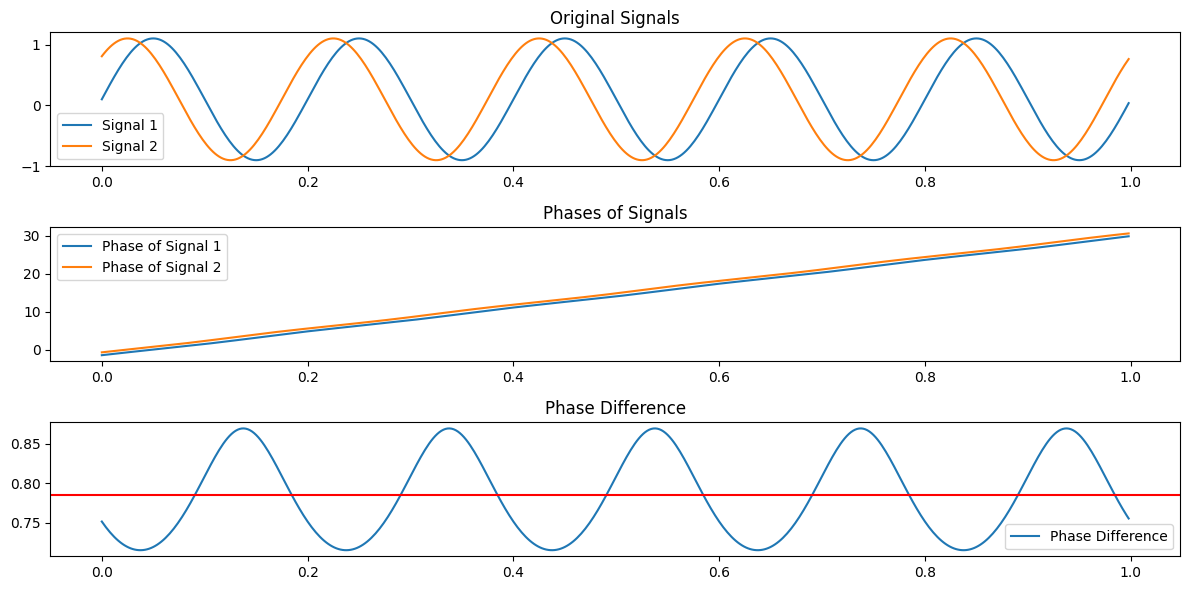

In [5]:
import numpy as np
from scipy.signal import hilbert
import matplotlib.pyplot as plt

# Пример сигналов
t = np.linspace(0, 1, 500, endpoint=False)
signal1 = 0.1+np.sin(2 * np.pi * 5 * t)  # Сигнал 1 с частотой 5 Гц
signal2 = 0.1+np.sin(2 * np.pi * 5 * t + np.pi / 4)  # Сигнал 2 с частотой 5 Гц и фазовым сдвигом pi/4

# Вычисление аналитических сигналов
analytic_signal1 = hilbert(signal1)
analytic_signal2 = hilbert(signal2)

# Извлечение фаз
phase1 = np.unwrap(np.angle(analytic_signal1))
phase2 = np.unwrap(np.angle(analytic_signal2))

# Разность фаз
phase_difference = phase2 - phase1

# Визуализация
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, signal1, label='Signal 1')
plt.plot(t, signal2, label='Signal 2')
plt.legend()
plt.title('Original Signals')

plt.subplot(3, 1, 2)
plt.plot(t, phase1, label='Phase of Signal 1')
plt.plot(t, phase2, label='Phase of Signal 2')
plt.legend()
plt.title('Phases of Signals')

plt.subplot(3, 1, 3)
plt.plot(t, phase_difference, label='Phase Difference')
plt.axhline(np.pi/4, color='r')
plt.legend()
plt.title('Phase Difference')

plt.tight_layout()
plt.show()


10 10


<ErrorbarContainer object of 3 artists>

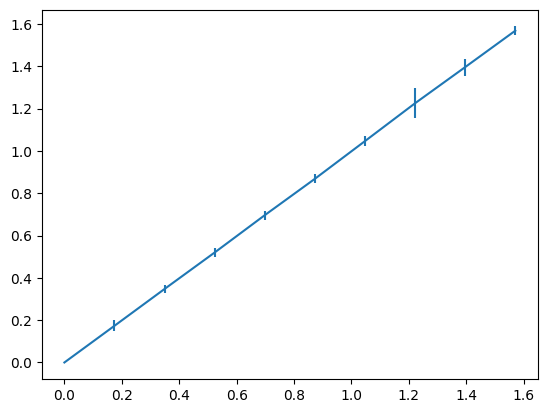

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Пример сигналов
t = np.linspace(0, 20, 20000, endpoint=False)
dt = t[1]-t[0]
def calc_nu(dt, signal):
    # Вычисление автокорреляции
    autocorr = correlate(signal, signal, mode='full')

    # Нахождение индекса максимальной автокорреляции (после начального пика)
    max_index = np.argmax(autocorr[len(signal):]) + len(signal)

    # Вычисление периода
    period = (max_index - len(signal)) * dt
    return period

def calc_df_from_nu(nu, dph):
    signal1 = 1+2*np.sin(2*np.pi * nu * t)  # Сигнал 1 с частотой 5 Гц
    signal2 = 1.1+2*np.sin(2*np.pi * nu * t + dph)  # Сигнал 2 с частотой 5 Гц и фазовым сдвигом pi/4

    # Вычисление кросс-корреляции
    correlation = correlate(signal1, signal2, mode='full')

    # Нахождение индекса максимальной корреляции
    lag = np.argmax(correlation) - (len(signal1) - 1)

    # Вычисление временной задержки
    time_delay = lag * (t[1] - t[0])

    # Вычисление разности фаз
    phase_difference = 2 * np.pi * nu * time_delay  # Умножаем на частоту сигнала
    return phase_difference
    



NU = np.linspace(1, 20, 100)
DPH = np.linspace(0, np.pi/2, 10)
phase_difference = np.zeros_like(NU)
DP_mean = np.zeros_like(DPH)
DP_std = np.zeros_like(DPH)
for j, dph in enumerate(DPH):
    for i, nu in enumerate(NU):
        phase_difference[i] = abs(calc_df_from_nu(nu, dph))%np.pi
    #plt.scatter(NU, phase_difference)
    #plt.title(f'dph={dph}')
    #plt.show()
    m = phase_difference.mean()
    std = phase_difference.std()
    DP_mean[j] = m
    DP_std[j] = std
    #print(m, std, std/m)
print(len(DPH), len(DP_mean))
plt.errorbar(DPH, DP_mean, yerr=DP_std)

1.0


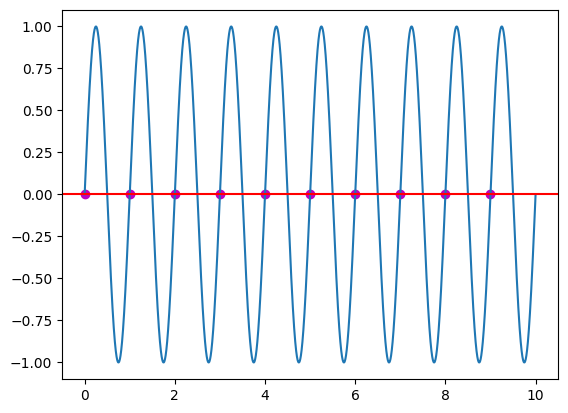

In [87]:
t = np.linspace(0, 10, 20000, endpoint=False)
signal = np.sin(2*np.pi*t)

def calc_T(T, signal):    
    mean = np.mean(signal)
    mean_idx = np.where(np.logical_and(signal[1:]>=mean, signal[:-1]<=mean))
    plt.plot(t, signal)
    plt.axhline(mean, color='r')
    plt.scatter(t[mean_idx], signal[mean_idx], color='m')
    T = np.mean(np.diff(t[mean_idx]))
    return T
print(calc_T(t, signal))